In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

2025-01-26 17:18:16.297154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the saved model
model = tf.keras.models.load_model("waste_classification_model.keras")

/Users/bixentesehabiague/anaconda3/envs/monenv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
# Path to the folder containing the images to test
data_dir = "data"  # Replace with the path to the "data" folder

In [4]:
# List of files in the folder
image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpeg')]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


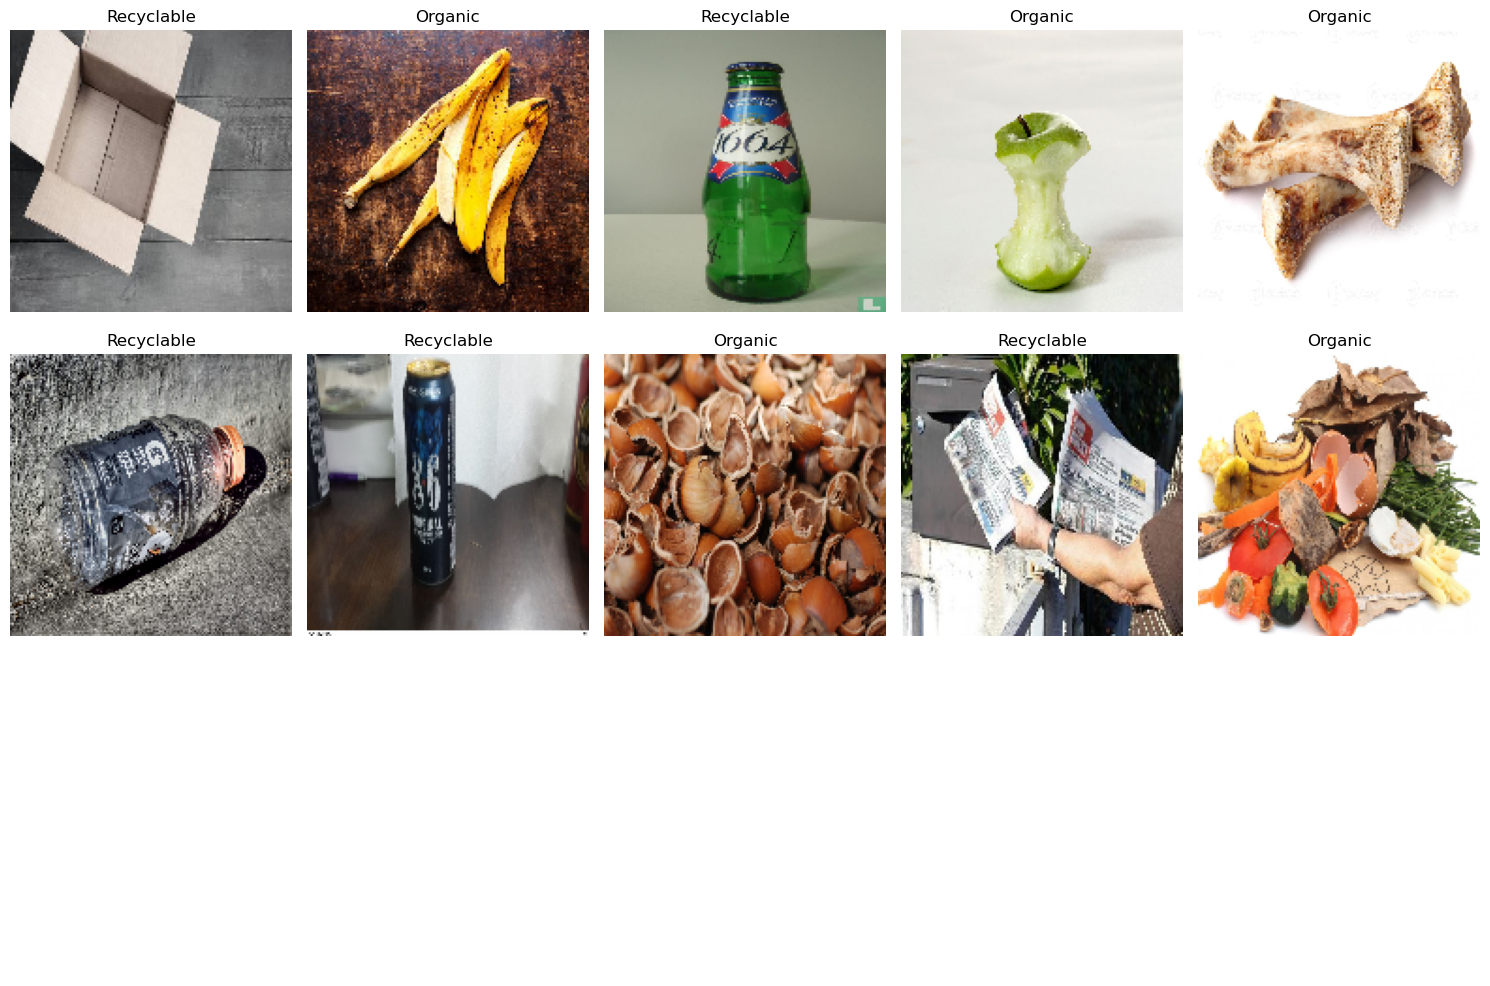

In [5]:
# Number of images per row
images_per_row = 5

# Image preprocessing and prediction
fig, axes = plt.subplots(
    nrows=(len(image_files) // images_per_row) + 1,
    ncols=images_per_row,
    figsize=(15, 10)
)
axes = axes.flatten()  # Flatten the grid of axes for easier access

for i, img_file in enumerate(image_files):
    img_path = os.path.join(data_dir, img_file)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))  # Resize
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Make a prediction with the model
    prediction = model.predict(img_array)
    label = "Recyclable" if prediction[0] > 0.5 else "Organic"
    
    # Display the image and label
    axes[i].imshow(img)
    axes[i].set_title(f"{label}")
    axes[i].axis('off')

# Disable unused axes
for i in range(len(image_files), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()